<a href="https://colab.research.google.com/github/hoidv/CS114.P11/blob/main/show_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import random
import os

def display_random_car(data, root_path, num_img_per_row=10, img_heigth=1.5, img_width=1.5):
  cars_brand_set = {0 : 'Other', 1 : 'Honda', 2 : 'Hyundai', 3 : 'KIA',
                    4 : 'Mazda', 5 : 'Mitsubishi', 6 : 'Suzuki',
                    7 : 'Toyota', 8 : 'VinFast'}

  #GroupBy data theo từng CategoryID
  grouped_data = data.groupby('CategoryID')
  category_ids = grouped_data.groups.keys()
  n_category = len(category_ids)

  #Thiết lập kích thước subplot
  w_ratios = [2] + [1 for _ in range(num_img_per_row)]
  h_space = 0.1
  w_space = 0.1
  w_size = img_width * sum(w_ratios) + w_space * (len(w_ratios) - 1)
  h_size = img_heigth * n_category + h_space * (n_category - 1)

  #Tạo subplot
  fig, axes = plt.subplots(nrows=n_category, ncols=num_img_per_row + 1,
                           figsize=(w_size, h_size),
                           gridspec_kw={'width_ratios': w_ratios, 'wspace' : w_space, 'hspace' : h_space}
                           )

  #Plot tiêu đề và hình ảnh
  for i, category_id in enumerate(category_ids):
    #Plot tiêu đề (được đặt ở đầu dòng)
    brand_name = cars_brand_set[category_id]
    axes[i,0].text(0, 0.5, f"{brand_name}", ha = 'left', va = 'center', fontsize = img_width * 15, fontweight='bold')

    #Lấy data cho từng loại xe và chọn random theo num_img_per_row
    image_paths = grouped_data.get_group(category_id)['Path'].tolist()
    random_sample = random.sample(image_paths, num_img_per_row)

    #Plot image
    for j, image_path in enumerate(random_sample):
      random_path = os.path.join(root_path, image_path)
      img = Image.open(random_path)
      axes[i,j + 1].imshow(img, aspect='auto')
      axes[i,j + 1].axis('off')
    axes[i,0].axis('off')
  plt.show()

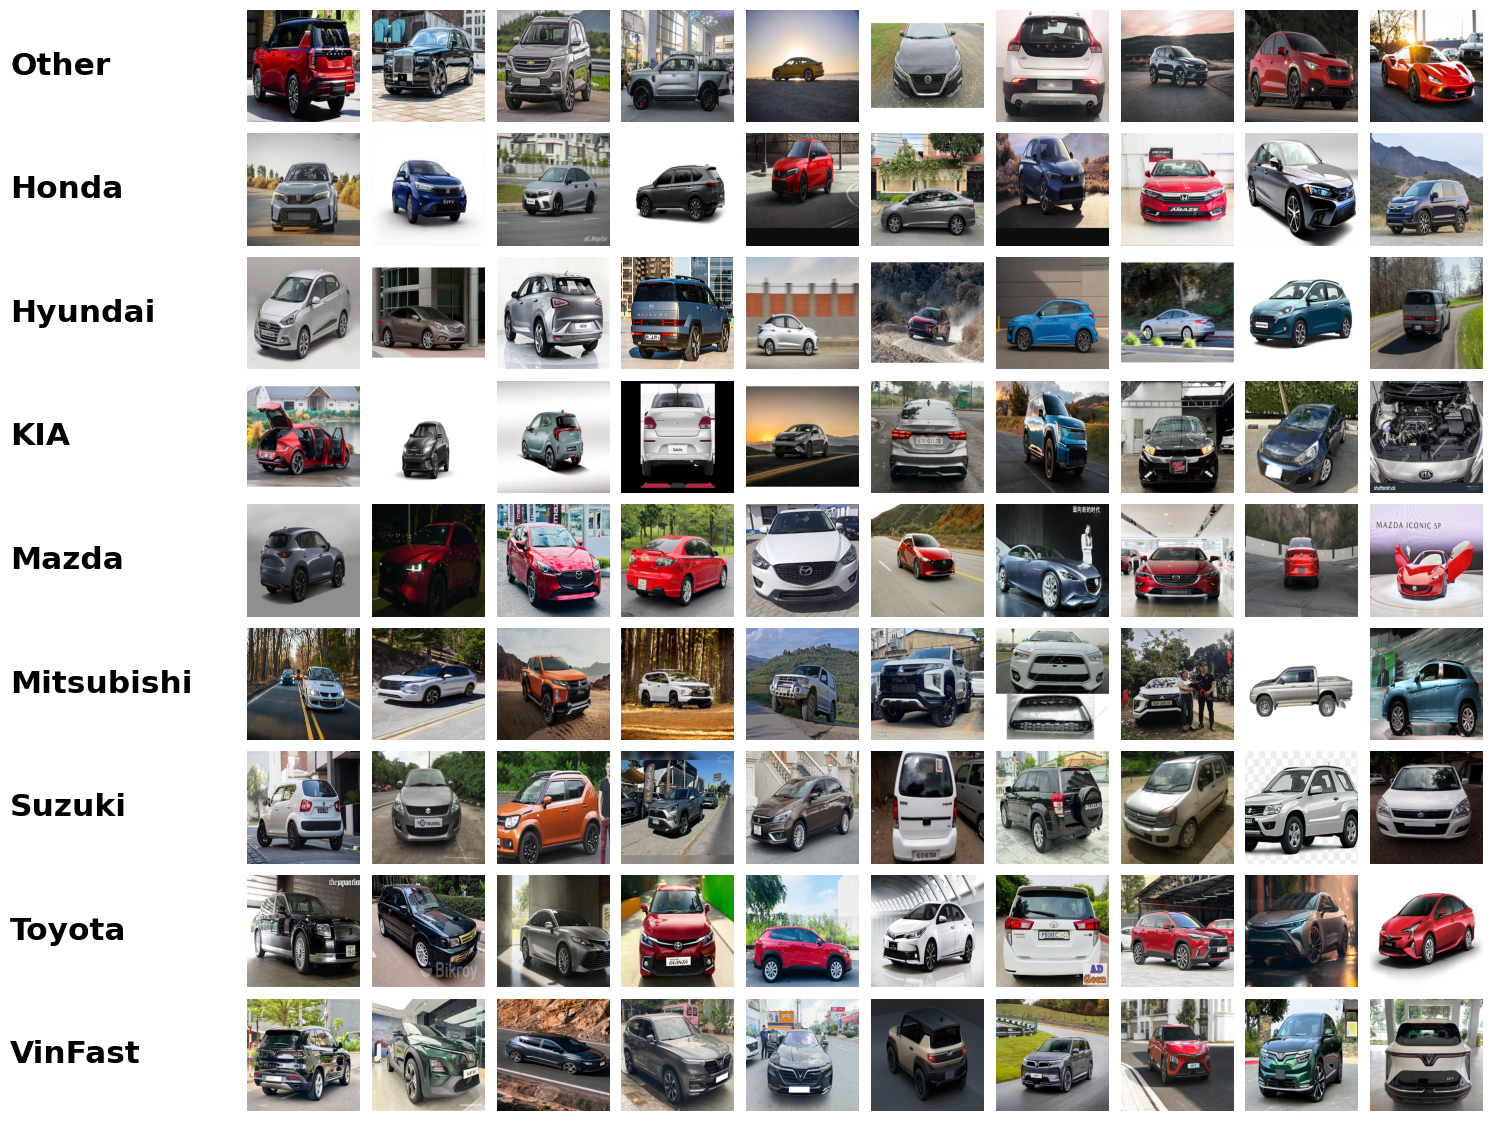

In [54]:
import pandas as pd

#Lấy path của file data
data_path = 'drive/MyDrive/Colab Notebooks/data/CarDataset.csv'
car_df = pd.read_csv(data_path)

#Lấy path của thư mục chứa hình ảnh
img_folder_path = '/content/drive/MyDrive/Public'

display_random_car(car_df, img_folder_path)